## Module 7 - Problem Solving in Data Science

So far in this course we have taken one topic or tool at a time and looked at how we could tackle a given data problem. In this final module, it is time to bring them together to solve data problems from start to finish. This process typically includes importing data, cleaning and processing it for analysis, visualizing and developing models based on the nature of problem.

(Note: I will be using Python for this presentation as you can find the the same datasets solved using R in the textbook)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Dermatology dataset

**Step 1: Load the data** <br>
We will start by looking at a dataset with which we can try out several of the techniques we have learned so far. Go ahead and import the dermatology.csv file which contains patients' clinical and histopathological features related to skin diseases. There are 35 variables of which the last column 'Disease' is the class label.

In [2]:
derm_df = pd.read_csv('dermatology.csv', header = 0, sep = '\t')
derm_df.head()

,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


From the dataset fields, except for Age all other independent variables are ordinal ranging from a degree of 0-3 and  Family History ranges from 0-1. The class label Disease contains 6 categories of diseases, let's assign the correct data types for Age and Disease columns in the dataframe.

In [3]:
derm_df['Age'] = pd.to_numeric(derm_df['Age'], errors='coerce')
derm_df['Disease'] = derm_df['Disease'].astype('category')

**Step 2: Visual Exploration of data** <br>
Let us create a simple box-plot visualization between age and different categories of diseases. 

In [4]:
derm_df['Age'] = derm_df['Age'].fillna(derm_df['Age'].median())  # fill any null values in Age with median 

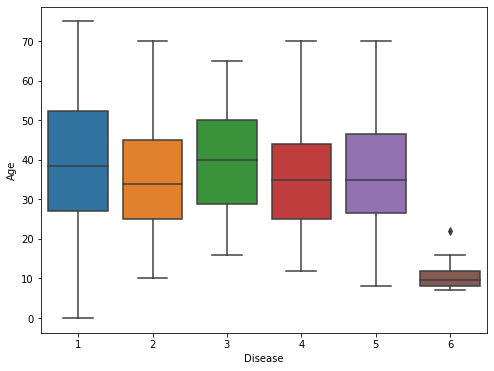

In [5]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(derm_df['Disease'],derm_df['Age'])
plt.show()

The plot shows us that age is not a very good indicator to disease, as most disease types span over a wide range of ages. Let's see if there is some relationship between age and disease, even if it is not very strong.

**Step 3: Simple Linear Regression** <br>
We will now attempt to learn the relationship between age and disease using a simple linear regression. As there are six different diseases here, let's extract the data pertaining only to disease 1, to keep things simple!

In [6]:
derm_df['Disease1'] = derm_df['Disease'].apply(lambda x: x if x==1 else 0)  # create new column for disease type 1

In [7]:
res = sm.OLS(derm_df['Disease1'],derm_df['Age']).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:               Disease1   R-squared (uncentered):                   0.307
Model:                            OLS   Adj. R-squared (uncentered):              0.305
Method:                 Least Squares   F-statistic:                              161.4
Date:                Mon, 24 Aug 2020   Prob (F-statistic):                    7.09e-31
Time:                        08:17:45   Log-Likelihood:                         -235.62
No. Observations:                 366   AIC:                                      473.2
Df Residuals:                     365   BIC:                                      477.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The regression summary indicates that there is a weak linear relationship between Age and Disease type 1. This is expected as linear regression is not the ideal process to determine relationship between a numeric and categorical variable. So, which type of modeling do you think should be used? It's classification

**Step 4: Classification with Random Forests** <br>
For this example, we will use Random Forest classifier to predict disease types using the available features from the dataframe. Make sure to split the data into train and test sets, a ratio of 70:30 is used here.

In [8]:
derm_df.iloc[:, 0:33] = derm_df.iloc[:, 0:33].astype('category')

In [9]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(derm_df.iloc[:, 0:34], derm_df.iloc[:, 34], test_size=0.3) 
clf=RandomForestClassifier(n_estimators=100)  #create a classifier
clf.fit(X_train,y_train)  #train the model using training sets
y_pred=clf.predict(X_test)  #classify the test set

In [10]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[34  0  0  0  0  0]
 [ 1 18  0  0  0  0]
 [ 0  0 20  1  0  0]
 [ 0  3  0 13  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        34
           2       0.86      0.95      0.90        19
           3       1.00      0.95      0.98        21
           4       0.93      0.81      0.87        16
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         6

    accuracy                           0.95       110
   macro avg       0.96      0.95      0.95       110
weighted avg       0.96      0.95      0.95       110



And the results are quite astounding with a near perfect accuracy score. Now, although Random Forests address overfitting quite well, there could be a number of factors that still effect a model to overfit the data like the small size of patient records in our dataset. This could result in high classification accuracy on the given data, but may not work so well for unseen data in the future.

**Step 5: Clustering with k-means** <br>
We shall also try an unsupervised clustering model to visualize the disease types based on our independent variables. As the variables are mostly categorical, we need to scale them down to standard unit scale, and use PCA to reduce the data to two dimensions. As we already know there are 6 disease types, let's fit 6 clusters and visualize if the data points are clearly seperated!

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

X_digits = derm_df.iloc[:, 0:34].values
y_digits = derm_df.iloc[:, 34].values
data = scale(X_digits)  #scale the categorical data levels to unit variance
n_digits = len(np.unique(y_digits))
labels = y_digits

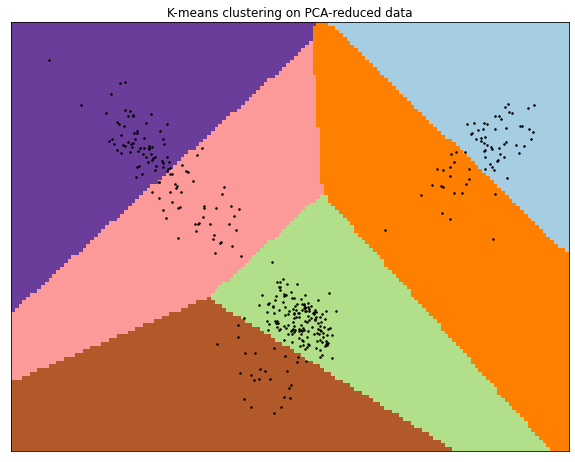

In [12]:
# Apply Principal Component Analysis to reduce data from 34 dimensions to 2 dimensions
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)  #K-means clustering with 6 clusters
kmeans.fit(reduced_data)


# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(10,8))
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)

plt.title('K-means clustering on PCA-reduced data')
plt.xticks(())
plt.yticks(())
plt.show()

Despite splitting into 6 clusters we can observe from the plot that there are 3 primary collection of data points. What this means based on our variables is that although there are 6 types of diseases there are only minor differences between each of the three pairs of diseases. 

### Yelp Reviews and Ratings dataset 
So, let us look at another real-life dataset, this time from an online review-sharing service, Yelp. <br> We will import Yelp's business and user related datasets for this example, available from its dataset challenge website.

In [13]:
yelpB_df = pd.read_csv('yelp_academic_dataset_business.csv', header = 0, sep = ',')
yelpB_df.head()

,business_id,name,full_address,hours,open,categories,city,state,review_count,stars
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",True,"['Fast Food', 'Restaurants']",Dravosburg,PA,4,4.5
1,UsFtqoBl7naz8AVUBZMjQQ,Clancy's Pub,"202 McClure St\nDravosburg, PA 15034",{},True,['Nightlife'],Dravosburg,PA,4,3.5
2,3eu6MEFlq2Dg7bQh8QbdOg,Joe Cislo's Auto,"1 Ravine St\nDravosburg, PA 15034",{},True,"['Auto Repair', 'Automotive']",Dravosburg,PA,3,5.0
3,cE27W9VPgO88Qxe4ol6y_g,Cool Springs Golf Center,"1530 Hamilton Rd\nBethel Park, PA 15234",{},False,"['Active Life', 'Mini Golf', 'Golf']",Bethel Park,PA,5,2.5
4,HZdLhv6COCleJMo7nPl-RA,Verizon,"301 South Hills Village\nPittsburgh, PA 15241","{'Thursday': {'close': '17:00', 'open': '10:00...",True,"['Shopping', 'Home Services', 'Internet Servic...",Pittsburgh,PA,5,2.5


As you can see most of the fields are categorical, let's visualize how the businesses are spread across various states using a barplot/countplot. 

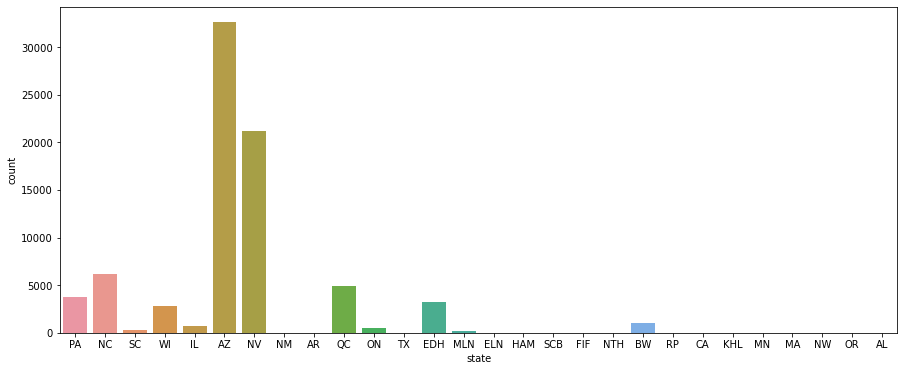

In [14]:
fig = plt.figure(figsize=(15,6))
sns.countplot('state', data=yelpB_df)
plt.show()

So, most of the businesses in our dataset are located in Arizona and Nevada. Yelp has intentionally provided data focusing on these two states.<br> Similarly, we will also look at the percentage distribution of businesses by ratings in a pie chart.

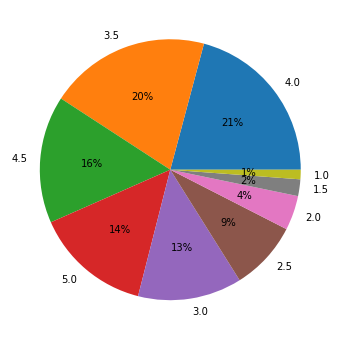

In [15]:
stars = yelpB_df['stars'].value_counts()

fig = plt.figure(figsize=(6,6))
plt.pie(stars, labels=list(stars.index.values), autopct='%1.0f%%')
plt.show()

This is a simple way to get a sense of how various businesses are distributed across “quality” measured by visitors' ratings. I will leave the business data here for you to explore more. Let's turn our attention to the user data, which is more interesting. The "users", in this context, are those who have provided reviews or ratings for businesses on Yelp. Let us load up this dataset:

In [39]:
yelpU_df = pd.read_csv('yelp_academic_dataset_user.csv', header = 0, sep = ',', converters={'friends': eval, 'elite': eval})
print(yelpU_df.shape)
yelpU_df.head()

(552339, 11)


,user_id,name,review_count,average_stars,cool_votes,funny_votes,useful_votes,friends,elite,yelping_since,fans
0,18kPq7GPye-YQ3LyKyAZPw,Russel,108,4.14,245,167,280,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...","[2005, 2006]",2004-10,70
1,rpOyqD_893cqmDAtJLbdog,Jeremy,1274,3.66,11093,7681,14199,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",2004-10,1179
2,4U9kSBLuBDU391x6bxU-YA,Michael,442,3.60,732,908,1483,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",2004-10,100
3,fHtTaujcyKvXglE33Z5yIw,Ken,11,4.64,5,1,11,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",[],2004-10,2
4,SIBCL7HBkrP4llolm4SC2A,Katherine,66,3.80,13,11,34,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",[2005],2004-10,4


Notice that the user dataset has more than half-a-million records and 11 columns, which is certainly a good amount of data to work with. Let us look at the votes, there are three columns named **cool_votes, funny_votes**, and **useful_votes**. We can subset those columns using the following command:

In [17]:
votes_df = yelpU_df.loc[:,['cool_votes','funny_votes','useful_votes']]
votes_df.corr()

,cool_votes,funny_votes,useful_votes
cool_votes,1.000000,0.976411,0.983271
funny_votes,0.976411,1.000000,0.954654
useful_votes,0.983271,0.954654,1.000000


We see that there are strong positive correlations among these three variables, which should make it easy to build a good regression model in which you can use one or two of these variables and predict the third one. Similarly, let's see if writing more reviews bring more fans or if providing useful votes bring more fans. 

In [21]:
print(round(yelpU_df['review_count'].corr(yelpU_df['fans']),2))
print(round(yelpU_df['useful_votes'].corr(yelpU_df['fans']),2))

0.58
0.79


That gives a value of 0.58 and 0.79 respectively, which is about medium-strong correlation between review count and fans; and strong correlation between useful votes and fans. These are high correlation values which gives us some confidence that we could make a good prediction of fan count based on the numerical variables.<br> But first we will transform the dataframe to derive few more numerical fields, the **friends** column contains a list of user_id's who are friends to the user for that row. We can get count of friends per user from this column, similarly we can get the number of years a user had an elite status. And finally the **yelping_since** column gives us for how many years a user is member of Yelp.

In [56]:
yelpU_df['friend_count'] = yelpU_df['friends'].str.len()
yelpU_df['elite_years'] = yelpU_df['elite'].str.len()
yelpU_df['yelp_years'] = (2020 - yelpU_df['yelping_since'].str[:4].astype('int16'))
yelpU_df.head()

,user_id,name,review_count,average_stars,cool_votes,funny_votes,useful_votes,friends,elite,yelping_since,fans,friend_count,elite_years,yelp_years
0,18kPq7GPye-YQ3LyKyAZPw,Russel,108,4.14,245,167,280,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...","[2005, 2006]",2004-10,70,202,2,16
1,rpOyqD_893cqmDAtJLbdog,Jeremy,1274,3.66,11093,7681,14199,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",2004-10,1179,1936,11,16
2,4U9kSBLuBDU391x6bxU-YA,Michael,442,3.60,732,908,1483,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",2004-10,100,405,11,16
3,fHtTaujcyKvXglE33Z5yIw,Ken,11,4.64,5,1,11,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",[],2004-10,2,4,0,16
4,SIBCL7HBkrP4llolm4SC2A,Katherine,66,3.80,13,11,34,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",[2005],2004-10,4,4,1,16


The datarfame is looking good with more numeric fields, which are ideal for regression. Let's subset the numeric variables into a new dataframe along with **user_id** which can be used as an index. 

In [60]:
yelpFans_df = yelpU_df.loc[:,['user_id','review_count','average_stars','useful_votes','friend_count','elite_years','yelp_years','fans']].set_index('user_id')
yelpFans_df

,review_count,average_stars,useful_votes,friend_count,elite_years,yelp_years,fans
user_id,,,,,,,
18kPq7GPye-YQ3LyKyAZPw,108,4.14,280,202,2,16,70
rpOyqD_893cqmDAtJLbdog,1274,3.66,14199,1936,11,16,1179
4U9kSBLuBDU391x6bxU-YA,442,3.60,1483,405,11,16,100
fHtTaujcyKvXglE33Z5yIw,11,4.64,11,4,0,16,2
SIBCL7HBkrP4llolm4SC2A,66,3.80,34,4,1,16,4
...,...,...,...,...,...,...,...
5bWq6eXzWQ15S-0qTNjr5Q,62,4.27,22,0,0,6,0
IfvSeVlGZJUlYnTYRWJhKQ,2,1.00,0,0,0,6,0
OhR-zDBVoGC7GjZ8h3MZjw,2,3.50,2,0,0,5,0


Before moving on to modeling it is often important to look at the distribution of our independent and dependant variables. 

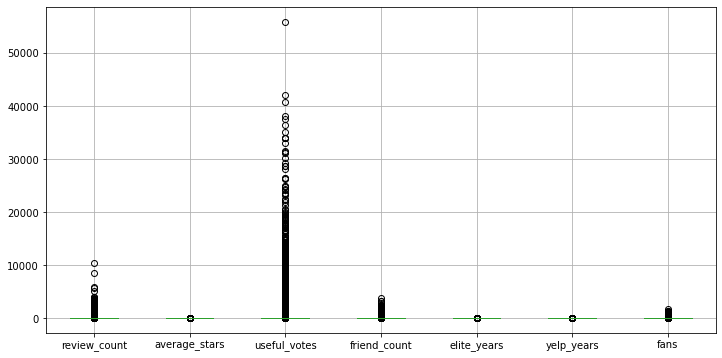

In [72]:
fig = plt.figure(figsize=(12,6))
yelpFans_df.boxplot()
plt.show()

From the boxplots, we can observe the range and extreme positive skewness in the variables. This is problematic when building a regression model which assumes normal distribution and linear relationships between variables. There are a few techniques to normalize the data, we will use Log+1 transformation here:

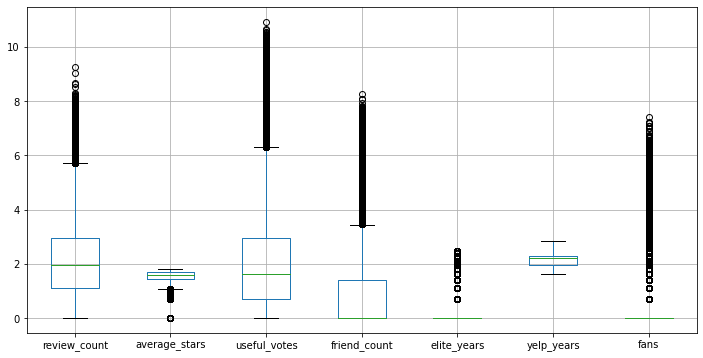

In [114]:
FansLog_df = np.log(yelpFans_df+1)
fig = plt.figure(figsize=(12,6))
FansLog_df.boxplot()
plt.show()

Compare the boxplots of transformed data to the original. Log+1 transformation works much better to reduce positive skewness and improve symmetry in data, but notice that **average_stars** variable has deteriorated with more outliers than original, this is because it was initially negatively skewed. I will leave it to you to handle that field seperately.<br>
Let's take a look at summary statistics and move on to build the model:

In [120]:
FansLog_df.describe()

,review_count,average_stars,useful_votes,friend_count,elite_years,yelp_years,fans
count,552339.000000,552339.000000,552339.000000,552339.000000,552339.000000,552339.000000,552339.000000
mean,2.189043,1.523253,1.952225,0.808769,0.071439,2.175122,0.306880
std,1.303837,0.276810,1.666253,1.159397,0.309679,0.234512,0.678314
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000
25%,1.098612,1.446919,0.693147,0.000000,0.000000,1.945910,0.000000
50%,1.945910,1.589235,1.609438,0.000000,0.000000,2.197225,0.000000
75%,2.944439,1.704748,2.944439,1.386294,0.000000,2.302585,0.000000
max,9.241936,1.791759,10.931999,8.246172,2.484907,2.833213,7.413367


Look at the difference between third quartile and maximum values, many fields still have considerable amoount of outliers in the data. But as most of the data are outliers it doesn't make much sense to impute them, let's go ahead and build a multiple linear regression model as we have multiple independent variables.

In [121]:
from sklearn.linear_model import LinearRegression
X = FansLog_df.iloc[:, 0:6]
y = FansLog_df.iloc[:, 6]
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
MLR = LinearRegression()  #create a regression model
MLR.fit(X_train,y_train)  #train the model using training sets
y_pred = MLR.predict(X_test)  #predict the test set

In [122]:
coeff_df = pd.DataFrame(MLR.coef_, FansLog_df.iloc[:, 0:6].columns, columns=['Coefficient'])
coeff_df

,Coefficient
review_count,0.072055
average_stars,0.008646
useful_votes,0.102806
friend_count,0.150183
elite_years,0.786130
yelp_years,-0.052314


Observe that the variable **elite_years** contributes most to the fans. Which means, the more number of years a user stay in elite status, the more number of fans he/she can make. 

In [123]:
# The root mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % metrics.r2_score(y_test, y_pred))

Root Mean squared error: 0.38
Coefficient of determination: 0.69


Coming to evaluation metrics, let's look at RMSE and R-squared values. RMSE is a relative metric and is dependent on the **fans** variable. Even though a value of 0.38 looks "small", if we look at the range and mean of **fans** variable, 7.41 and 0.31 respectively, the RMSE is not small enough. But the R-squared being an absolute value between 0-1, is moderately strong for 0.69. Overall what this means for our model is that most of the predictions are reasonably good but the variability of error is high. There are several advanced techniques and metrics to improve model accuracy and evaluating machine learning models, which you will learn in the upcoming courses.  

This concludes the presentation for the final module in this course.